
 **students academic performance** 

In [ ]:
##dataset:https://www.kaggle.com/aljarah/xAPI-Edu-Data/download

importing necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as met
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
%matplotlib inline

In [ ]:
dataset=pd.read_csv('xAPI-Edu-Data.csv')

In [ ]:
dataset

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [ ]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
dataset.shape

(480, 17)

In [ ]:
dataset.info

<bound method DataFrame.info of     gender NationalITy  ... StudentAbsenceDays Class
0        M          KW  ...            Under-7     M
1        M          KW  ...            Under-7     M
2        M          KW  ...            Above-7     L
3        M          KW  ...            Above-7     L
4        M          KW  ...            Above-7     M
..     ...         ...  ...                ...   ...
475      F      Jordan  ...            Above-7     L
476      F      Jordan  ...            Under-7     M
477      F      Jordan  ...            Under-7     M
478      F      Jordan  ...            Above-7     L
479      F      Jordan  ...            Above-7     L

[480 rows x 17 columns]>

checking for no of unique values in the attributes

In [ ]:
dataset.nunique()

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
raisedhands                 82
VisITedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

In [ ]:
dataset.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [ ]:
dataset.corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


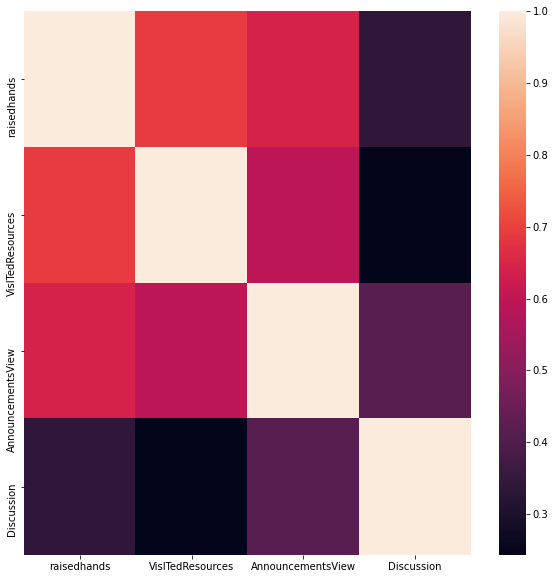

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

changing Categorical value to numerical value

In [ ]:
dataset['gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
gender = {'M': 1,'F': 2}
dataset.gender = [gender[item] for item in dataset.gender]

In [ ]:
dataset['gender'].unique()

array([1, 2])

In [ ]:
dataset['PlaceofBirth'].unique()

array(['KuwaIT', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Lybia'], dtype=object)

In [ ]:
dataset['NationalITy'].unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [ ]:
dataset.drop('NationalITy', axis=1, inplace=True)

In [ ]:
PlaceofBirth = {'KuwaIT': 1,'lebanon': 2,'Egypt':3,'SaudiArabia':4,'USA':5,'Quran':6,'Jordan':7,'venzuela':8,'Iran':9,'Tunis':10,'Morocco':11,'Syria':12,'Palestine':13,'Iraq':14,'Lybia':15}
dataset.PlaceofBirth = [PlaceofBirth[item] for item in dataset.PlaceofBirth]

In [ ]:
dataset['PlaceofBirth'].unique()

array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 14, 13, 15])

In [ ]:
dataset.shape

(480, 16)

In [ ]:
dataset['StageID'].unique()

array(['lowerlevel', 'MiddleSchool', 'HighSchool'], dtype=object)

In [ ]:
StageID = {'lowerlevel': 1,'MiddleSchool': 2,'HighSchool':3}
dataset.StageID = [StageID[item] for item in dataset.StageID]

In [ ]:
dataset['StageID'].unique()

array([1, 2, 3])

In [ ]:
dataset['GradeID'].unique()

array(['G-04', 'G-07', 'G-08', 'G-06', 'G-05', 'G-09', 'G-12', 'G-11',
       'G-10', 'G-02'], dtype=object)

In [ ]:
GradeID = {'G-04': 4,'G-07': 7,'G-08':8,'G-06':6,'G-05':5,'G-09':9,'G-12':12,'G-11':11,'G-10':10,'G-02':2,}
dataset.GradeID = [GradeID[item] for item in dataset.GradeID]

In [ ]:
dataset['GradeID'].unique()

array([ 4,  7,  8,  6,  5,  9, 12, 11, 10,  2])

In [ ]:
dataset['SectionID'].unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
SectionID = {'A': 1,'B': 2,'C':3}
dataset.SectionID = [SectionID[item] for item in dataset.SectionID]

In [ ]:
dataset['SectionID'].unique()

array([1, 2, 3])

In [ ]:
dataset['Topic'].unique()

array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)

In [ ]:
Topic = {'IT': 1,'Math': 2,'Arabic':3,'Science':4,'English':5,'Quran':6,'Spanish':7,'French':8,'History':9,'Biology':10,'Chemistry':11,'Geology':12}
dataset.Topic = [Topic[item] for item in dataset.Topic]

In [ ]:
dataset['Topic'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
dataset['Semester'].unique()

array(['F', 'S'], dtype=object)

In [ ]:
dataset['Semester'].value_counts()

F    245
S    235
Name: Semester, dtype: int64

In [ ]:
Semester = {'F': 1,'S': 2}
dataset.Semester = [Semester[item] for item in dataset.Semester]

In [ ]:
dataset['Semester'].unique()

array([1, 2])

In [ ]:
dataset['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

In [ ]:
Relation = {'Father': 0,'Mum': 1}
dataset.Relation = [Relation[item] for item in dataset.Relation]

In [ ]:
dataset['Relation'].unique()

array([0, 1])

In [ ]:
dataset['ParentAnsweringSurvey'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
ParentAnsweringSurvey = {'Yes': 0,'No': 1}
dataset.ParentAnsweringSurvey = [ParentAnsweringSurvey[item] for item in dataset.ParentAnsweringSurvey]

In [ ]:
dataset['ParentAnsweringSurvey'].unique()

array([0, 1])

In [ ]:
dataset['ParentschoolSatisfaction'].unique() 

array(['Good', 'Bad'], dtype=object)

In [ ]:
ParentschoolSatisfaction = {'Good': 0,'Bad': 1}
dataset.ParentschoolSatisfaction = [ParentschoolSatisfaction[item] for item in dataset.ParentschoolSatisfaction]

In [ ]:
dataset['ParentschoolSatisfaction'].unique()

array([0, 1])

In [ ]:
dataset['StudentAbsenceDays'].unique() 

array(['Under-7', 'Above-7'], dtype=object)

In [ ]:
StudentAbsenceDays = {'Under-7': 0,'Above-7': 1}
dataset.StudentAbsenceDays = [StudentAbsenceDays[item] for item in dataset.StudentAbsenceDays]

In [ ]:
dataset['StudentAbsenceDays'].unique()

array([0, 1])

now checking the correation and heatmap

In [ ]:
dataset.corr()

,gender,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
gender,1.000000,0.016105,-0.017793,-0.018304,-0.054907,0.071017,-0.049156,0.195142,0.149978,0.210932,0.052139,0.124703,-0.022359,-0.093478,-0.209011
PlaceofBirth,0.016105,1.000000,-0.085201,-0.091757,-0.151550,0.491876,0.112804,0.242755,0.227104,0.291238,0.286739,0.003740,-0.074358,-0.244247,-0.051104
StageID,-0.017793,-0.085201,1.000000,0.951452,-0.296416,0.148853,0.029512,-0.034205,0.172751,0.068621,0.163666,0.161406,-0.114025,0.014272,-0.112536
GradeID,-0.018304,-0.091757,0.951452,1.000000,-0.329056,0.219534,0.076370,-0.034626,0.194382,0.078741,0.198552,0.180966,-0.116915,0.018349,-0.084896
SectionID,-0.054907,-0.151550,-0.296416,-0.329056,1.000000,-0.224213,0.046763,0.005783,-0.143862,-0.080909,-0.144955,-0.102538,0.018449,0.070405,-0.037062
Topic,0.071017,0.491876,0.148853,0.219534,-0.224213,1.000000,0.279511,0.241447,0.304377,0.378792,0.334392,-0.023449,-0.054063,-0.165179,-0.098395
Semester,-0.049156,0.112804,0.029512,0.076370,0.046763,0.279511,1.000000,0.148705,0.178358,0.173219,0.287066,0.019083,-0.023628,0.025258,-0.072462
Relation,0.195142,0.242755,-0.034205,-0.034626,0.005783,0.241447,0.148705,1.000000,0.364237,0.360240,0.339505,0.026720,-0.163811,-0.287698,-0.219687
raisedhands,0.149978,0.227104,0.172751,0.194382,-0.143862,0.304377,0.178358,0.364237,1.000000,0.691572,0.643918,0.339386,-0.316570,-0.297015,-0.463882
VisITedResources,0.210932,0.291238,0.068621,0.078741,-0.080909,0.378792,0.173219,0.360240,0.691572,1.000000,0.594500,0.243292,-0.382472,-0.363835,-0.499030


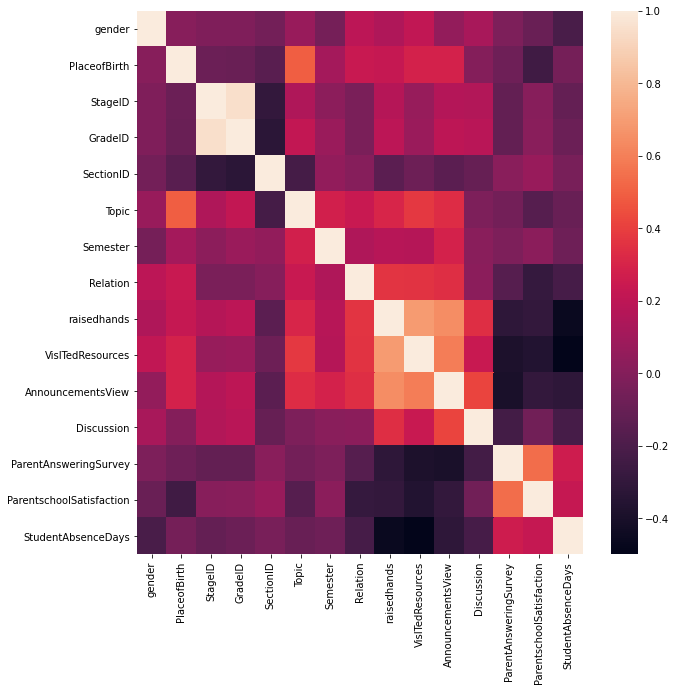

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

**Analysis of dataset**

Girls performed better than boys and they have better attendance than boys
Most of the students are from middle school
most of the students have enrolled for IT

LOGISTIC REGRESSION


starting with 50:50  train and test data

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=0)

In [ ]:
dataset.shape

(480, 16)

In [ ]:
X_train.shape,X_test.shape

((240, 15), (240, 15))

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
pred = lr.predict(X_train)
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, pred)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")


Train Result:
Accuracy Score: 71.73%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.71      0.71      0.71       103
           L       0.77      0.85      0.81        93
           M       0.68      0.64      0.66       140

    accuracy                           0.72       336
   macro avg       0.72      0.73      0.72       336
weighted avg       0.71      0.72      0.72       336

_______________________________________________
Confusion Matrix: 
 [[73  2 28]
 [ 1 79 13]
 [29 22 89]]



now 80:20 train and test data split

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
dataset.shape

(480, 16)

In [ ]:
X_train.shape,X_test.shape

((384, 15), (96, 15))

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = lr.predict(X_train)
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, pred)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")


Train Result:
Accuracy Score: 74.22%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.73      0.73      0.73       114
           L       0.78      0.85      0.81       104
           M       0.72      0.69      0.70       166

    accuracy                           0.74       384
   macro avg       0.74      0.75      0.75       384
weighted avg       0.74      0.74      0.74       384

_______________________________________________
Confusion Matrix: 
 [[ 83   2  29]
 [  1  88  15]
 [ 29  23 114]]



now 75:25 train and test data split

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
dataset.shape

(480, 16)

In [ ]:
X_train.shape,X_test.shape

((360, 15), (120, 15))

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = lr.predict(X_train)
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, pred)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")


Train Result:
Accuracy Score: 73.33%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.72      0.70      0.71       109
           L       0.80      0.81      0.80        94
           M       0.70      0.71      0.71       157

    accuracy                           0.73       360
   macro avg       0.74      0.74      0.74       360
weighted avg       0.73      0.73      0.73       360

_______________________________________________
Confusion Matrix: 
 [[ 76   2  31]
 [  1  76  17]
 [ 28  17 112]]



**now** 70:30 train and test data split

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
dataset.shape

(480, 16)

In [ ]:
X_train.shape,X_test.shape

((336, 15), (144, 15))

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = lr.predict(X_train)
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, pred)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")


Train Result:
Accuracy Score: 74.11%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.72      0.75      0.73       103
           L       0.80      0.86      0.83        93
           M       0.71      0.66      0.68       140

    accuracy                           0.74       336
   macro avg       0.74      0.75      0.75       336
weighted avg       0.74      0.74      0.74       336

_______________________________________________
Confusion Matrix: 
 [[77  1 25]
 [ 1 80 12]
 [29 19 92]]



**Accuracy of results of logistic regression with various test and train data proportion **


1.   50:50 -71.73%
2.   80:20 -74.22%
3.   75:25 -73.33%
4.   70:30 -74.11%

Among these highest accuracy is obtained in 80:20 proportion with 74.22%


**DECISION TREE**

starting with 50:50  train and test data

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=0)

In [ ]:
DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
decisiontreepredict=decisiontree.predict(X_test)
decisiontreepredict

array(['M', 'L', 'L', 'M', 'H', 'M', 'H', 'L', 'L', 'M', 'H', 'M', 'M',
       'L', 'H', 'M', 'M', 'L', 'M', 'H', 'L', 'M', 'M', 'M', 'M', 'H',
       'M', 'M', 'M', 'L', 'M', 'L', 'H', 'M', 'M', 'M', 'H', 'H', 'M',
       'M', 'H', 'L', 'M', 'H', 'H', 'M', 'M', 'M', 'M', 'L', 'M', 'H',
       'H', 'L', 'H', 'H', 'L', 'L', 'M', 'M', 'M', 'M', 'H', 'H', 'H',
       'M', 'M', 'M', 'L', 'L', 'L', 'L', 'M', 'L', 'H', 'M', 'M', 'L',
       'M', 'L', 'M', 'M', 'H', 'L', 'L', 'H', 'M', 'H', 'M', 'H', 'M',
       'H', 'H', 'H', 'M', 'H', 'L', 'M', 'L', 'H', 'L', 'M', 'M', 'M',
       'M', 'H', 'L', 'H', 'L', 'M', 'L', 'L', 'L', 'L', 'M', 'M', 'L',
       'H', 'M', 'H', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'M',
       'H', 'M', 'H', 'M', 'M', 'H', 'M', 'M', 'M', 'H', 'M', 'M', 'H',
       'H', 'H', 'L', 'H', 'L', 'L', 'H', 'M', 'M', 'M', 'M', 'H', 'M',
       'L', 'H', 'M', 'L', 'M', 'M', 'L', 'M', 'H', 'M', 'M', 'M', 'M',
       'M', 'L', 'M', 'H', 'H', 'L', 'M', 'H', 'M', 'M', 'L', 'H

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       1.00      1.00      1.00        68
           L       1.00      1.00      1.00        60
           M       1.00      1.00      1.00       112

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

_______________________________________________
Confusion Matrix: 
 [[ 68   0   0]
 [  0  60   0]
 [  0   0 112]]



now splitting 80:20 train and test proportion

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
decisiontreepredict=decisiontree.predict(X_test)
decisiontreepredict

array(['M', 'L', 'L', 'M', 'H', 'M', 'H', 'L', 'L', 'M', 'H', 'M', 'M',
       'L', 'H', 'M', 'M', 'L', 'M', 'H', 'L', 'M', 'M', 'M', 'M', 'H',
       'M', 'M', 'M', 'L', 'M', 'L', 'H', 'M', 'M', 'M', 'H', 'H', 'M',
       'M', 'H', 'L', 'M', 'H', 'H', 'M', 'M', 'M', 'M', 'L', 'M', 'H',
       'H', 'L', 'H', 'H', 'L', 'L', 'M', 'M', 'M', 'M', 'H', 'H', 'H',
       'M', 'M', 'M', 'L', 'L', 'L', 'L', 'M', 'L', 'H', 'M', 'M', 'L',
       'M', 'L', 'M', 'M', 'H', 'L', 'L', 'H', 'M', 'H', 'M', 'H', 'M',
       'H', 'H', 'H', 'M', 'H'], dtype=object)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       1.00      1.00      1.00        28
           L       1.00      1.00      1.00        23
           M       1.00      1.00      1.00        45

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96

_______________________________________________
Confusion Matrix: 
 [[28  0  0]
 [ 0 23  0]
 [ 0  0 45]]



now splitting 75:25 train and test proportion

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
decisiontreepredict=decisiontree.predict(X_test)
decisiontreepredict

array(['M', 'L', 'L', 'M', 'H', 'M', 'H', 'L', 'L', 'M', 'H', 'M', 'M',
       'L', 'H', 'M', 'M', 'L', 'M', 'H', 'L', 'M', 'M', 'M', 'M', 'H',
       'M', 'M', 'M', 'L', 'M', 'L', 'H', 'M', 'M', 'M', 'H', 'H', 'M',
       'M', 'H', 'L', 'M', 'H', 'H', 'M', 'M', 'M', 'M', 'L', 'M', 'H',
       'H', 'L', 'H', 'H', 'L', 'L', 'M', 'M', 'M', 'M', 'H', 'H', 'H',
       'M', 'M', 'M', 'L', 'L', 'L', 'L', 'M', 'L', 'H', 'M', 'M', 'L',
       'M', 'L', 'M', 'M', 'H', 'L', 'L', 'H', 'M', 'H', 'M', 'H', 'M',
       'H', 'H', 'H', 'M', 'H', 'L', 'M', 'L', 'H', 'L', 'M', 'M', 'M',
       'M', 'H', 'L', 'H', 'L', 'M', 'L', 'L', 'L', 'L', 'M', 'M', 'L',
       'H', 'M', 'H'], dtype=object)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       1.00      1.00      1.00        33
           L       1.00      1.00      1.00        33
           M       1.00      1.00      1.00        54

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

_______________________________________________
Confusion Matrix: 
 [[33  0  0]
 [ 0 33  0]
 [ 0  0 54]]



now splitting 70:30 train and test proportion

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
decisiontreepredict=decisiontree.predict(X_train)
decisiontreepredict

array(['H', 'L', 'H', 'L', 'L', 'H', 'M', 'M', 'M', 'M', 'H', 'M', 'L',
       'H', 'M', 'L', 'M', 'M', 'L', 'M', 'H', 'M', 'M', 'M', 'M', 'M',
       'L', 'M', 'H', 'H', 'L', 'M', 'H', 'M', 'M', 'L', 'H', 'H', 'L',
       'M', 'M', 'M', 'M', 'L', 'M', 'L', 'H', 'L', 'L', 'H', 'M', 'H',
       'M', 'H', 'H', 'L', 'H', 'L', 'L', 'M', 'H', 'H', 'M', 'H', 'M',
       'M', 'M', 'L', 'H', 'H', 'M', 'H', 'L', 'M', 'H', 'M', 'L', 'L',
       'H', 'M', 'M', 'L', 'L', 'H', 'H', 'L', 'M', 'M', 'L', 'M', 'H',
       'M', 'L', 'H', 'M', 'M', 'H', 'L', 'M', 'H', 'H', 'L', 'M', 'M',
       'M', 'M', 'M', 'M', 'L', 'L', 'M', 'L', 'L', 'L', 'M', 'M', 'L',
       'L', 'M', 'M', 'H', 'H', 'H', 'H', 'M', 'M', 'L', 'M', 'L', 'M',
       'M', 'L', 'L', 'M', 'L', 'H', 'L', 'M', 'H', 'L', 'M', 'M', 'H',
       'L', 'L', 'H', 'H', 'H', 'M', 'H', 'L', 'H', 'H', 'L', 'H', 'M',
       'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M', 'M', 'L', 'M', 'M', 'L',
       'H', 'M', 'L', 'L', 'H', 'H', 'M', 'L', 'H', 'L', 'L', 'L

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       1.00      1.00      1.00       103
           L       1.00      1.00      1.00        93
           M       1.00      1.00      1.00       140

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00       336

_______________________________________________
Confusion Matrix: 
 [[103   0   0]
 [  0  93   0]
 [  0   0 140]]



**Accuracy of results of Decision Tree with various test and train data proportion **


1.   50:50 -100%
2.   80:20 -100%
3.   75:25 -100%
4.   70:30 -100%

highest accuracy is obtained here with 100%


**NAIVE BAYES**

starting with 50:50  train and test data

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=0)
X_train.shape,X_test.shape
gaussNb=GaussianNB()
gaussNb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predict=gaussNb.predict(X_test)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_predict)}\n")

Train Result:
Accuracy Score: 70.42%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.63      0.76      0.69        68
           L       0.73      0.92      0.81        60
           M       0.75      0.55      0.64       112

    accuracy                           0.70       240
   macro avg       0.70      0.74      0.71       240
weighted avg       0.71      0.70      0.70       240

_______________________________________________
Confusion Matrix: 
 [[52  0 16]
 [ 0 55  5]
 [30 20 62]]



now splitting 80:20 train and test proportion

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
X_train.shape,X_test.shape
gaussNb=GaussianNB()
gaussNb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predict=gaussNb.predict(X_test)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_predict)}\n")

Train Result:
Accuracy Score: 70.83%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.59      0.82      0.69        28
           L       0.79      0.96      0.86        23
           M       0.79      0.51      0.62        45

    accuracy                           0.71        96
   macro avg       0.72      0.76      0.72        96
weighted avg       0.73      0.71      0.70        96

_______________________________________________
Confusion Matrix: 
 [[23  0  5]
 [ 0 22  1]
 [16  6 23]]



now splitting 75:25 train and test proportion

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape
gaussNb=GaussianNB()
gaussNb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predict=gaussNb.predict(X_test)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_predict)}\n")

Train Result:
Accuracy Score: 70.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.60      0.73      0.66        33
           L       0.79      0.91      0.85        33
           M       0.71      0.56      0.63        54

    accuracy                           0.70       120
   macro avg       0.70      0.73      0.71       120
weighted avg       0.70      0.70      0.69       120

_______________________________________________
Confusion Matrix: 
 [[24  0  9]
 [ 0 30  3]
 [16  8 30]]



now splitting 70:30 train and test proportion

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
X_train.shape,X_test.shape
gaussNb=GaussianNB()
gaussNb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predict=gaussNb.predict(X_test)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_predict)}\n")

Train Result:
Accuracy Score: 71.53%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.60      0.77      0.67        39
           L       0.76      0.94      0.84        34
           M       0.79      0.58      0.67        71

    accuracy                           0.72       144
   macro avg       0.72      0.76      0.73       144
weighted avg       0.73      0.72      0.71       144

_______________________________________________
Confusion Matrix: 
 [[30  0  9]
 [ 0 32  2]
 [20 10 41]]



**Accuracy of results of Naive bayes with various test and train data proportion**


1.   50:50 -70.42%
2.   80:20 -70.83%
3.   75:25 -70.00%
4.   70:30 -71.53%

Among these highest accuracy is obtained in 70:30 proportion with 71.53%


**MULTILAYER PERCEPTRON**

starting with 50:50  train and test data

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=0)
multilayerperceptron=MLPClassifier(max_iter=500, activation='relu')

In [ ]:
multilayerperceptron.fit(X_train,y_train)
multilayerperceptron_Predict=multilayerperceptron.predict(X_test)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, multilayerperceptron_Predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, multilayerperceptron_Predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, multilayerperceptron_Predict)}\n")

Train Result:
Accuracy Score: 70.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.62      0.59      0.61        68
           L       0.80      0.87      0.83        60
           M       0.68      0.68      0.68       112

    accuracy                           0.70       240
   macro avg       0.70      0.71      0.71       240
weighted avg       0.70      0.70      0.70       240

_______________________________________________
Confusion Matrix: 
 [[40  1 27]
 [ 0 52  8]
 [24 12 76]]



now splitting 80:20 train and test proportion

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
multilayerperceptron=MLPClassifier(max_iter=500, activation='relu')

In [ ]:
multilayerperceptron.fit(X_train,y_train)
multilayerperceptron_Predict=multilayerperceptron.predict(X_test)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, multilayerperceptron_Predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, multilayerperceptron_Predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, multilayerperceptron_Predict)}\n")

Train Result:
Accuracy Score: 71.88%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.59      0.57      0.58        28
           L       0.88      0.96      0.92        23
           M       0.70      0.69      0.70        45

    accuracy                           0.72        96
   macro avg       0.73      0.74      0.73        96
weighted avg       0.71      0.72      0.72        96

_______________________________________________
Confusion Matrix: 
 [[16  0 12]
 [ 0 22  1]
 [11  3 31]]



now splitting 75:25 train and test proportion

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
multilayerperceptron=MLPClassifier(max_iter=500, activation='relu')

In [ ]:
multilayerperceptron.fit(X_train,y_train)
multilayerperceptron_Predict=multilayerperceptron.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, multilayerperceptron_Predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, multilayerperceptron_Predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, multilayerperceptron_Predict)}\n")

Train Result:
Accuracy Score: 71.67%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.67      0.67      0.67        33
           L       0.82      0.82      0.82        33
           M       0.69      0.69      0.69        54

    accuracy                           0.72       120
   macro avg       0.72      0.72      0.72       120
weighted avg       0.72      0.72      0.72       120

_______________________________________________
Confusion Matrix: 
 [[22  0 11]
 [ 0 27  6]
 [11  6 37]]



now splitting 70:30 train and test proportion

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
multilayerperceptron=MLPClassifier(max_iter=500, activation='relu')

In [ ]:
multilayerperceptron.fit(X_train,y_train)
multilayerperceptron_Predict=multilayerperceptron.predict(X_test)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, multilayerperceptron_Predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, multilayerperceptron_Predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, multilayerperceptron_Predict)}\n")

Train Result:
Accuracy Score: 73.61%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.64      0.72      0.67        39
           L       0.79      0.88      0.83        34
           M       0.77      0.68      0.72        71

    accuracy                           0.74       144
   macro avg       0.73      0.76      0.74       144
weighted avg       0.74      0.74      0.74       144

_______________________________________________
Confusion Matrix: 
 [[28  1 10]
 [ 0 30  4]
 [16  7 48]]



**Accuracy of results of Multi Layer Perceptrons with various test and train data proportion**


1.   50:50 -70.00%
2.   80:20 -71.88%
3.   75:25 -71.67%
4.   70:30 -73.61%

Among these highest accuracy is obtained in 70:30 proportion with 73.61%


**KNN CLASSIFICATION**







starting with 50:50  train and test data

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=0)

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_predict = KNN.predict(X_test)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, KNN_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, KNN_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, KNN_predict)}\n")

Train Result:
Accuracy Score: 61.25%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.57      0.51      0.54        68
           L       0.67      0.75      0.71        60
           M       0.60      0.60      0.60       112

    accuracy                           0.61       240
   macro avg       0.61      0.62      0.62       240
weighted avg       0.61      0.61      0.61       240

_______________________________________________
Confusion Matrix: 
 [[35  3 30]
 [ 0 45 15]
 [26 19 67]]



now splitting 80:20 train and test proportion

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_predict = KNN.predict(X_test)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, KNN_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, KNN_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, KNN_predict)}\n")

Train Result:
Accuracy Score: 65.62%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.60      0.54      0.57        28
           L       0.74      0.87      0.80        23
           M       0.64      0.62      0.63        45

    accuracy                           0.66        96
   macro avg       0.66      0.68      0.67        96
weighted avg       0.65      0.66      0.65        96

_______________________________________________
Confusion Matrix: 
 [[15  0 13]
 [ 0 20  3]
 [10  7 28]]



now splitting 75:25 train and test proportion

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_predict = KNN.predict(X_test)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, KNN_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, KNN_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, KNN_predict)}\n")

Train Result:
Accuracy Score: 62.50%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.55      0.48      0.52        33
           L       0.76      0.76      0.76        33
           M       0.59      0.63      0.61        54

    accuracy                           0.62       120
   macro avg       0.63      0.62      0.63       120
weighted avg       0.62      0.62      0.62       120

_______________________________________________
Confusion Matrix: 
 [[16  1 16]
 [ 0 25  8]
 [13  7 34]]



now splitting 70:30 train and test proportion

In [ ]:
X=dataset.drop('Class',axis=1)
y=dataset["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_predict = KNN.predict(X_test)

In [ ]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, KNN_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, KNN_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, KNN_predict)}\n")

Train Result:
Accuracy Score: 63.19%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           H       0.53      0.49      0.51        39
           L       0.71      0.79      0.75        34
           M       0.64      0.63      0.64        71

    accuracy                           0.63       144
   macro avg       0.63      0.64      0.63       144
weighted avg       0.63      0.63      0.63       144

_______________________________________________
Confusion Matrix: 
 [[19  2 18]
 [ 0 27  7]
 [17  9 45]]



**Accuracy of results of KNN Classification with various test and train data proportion**


1.   50:50 -61.25%
2.   80:20 -65.62%
3.   75:25 -62.50%
4.   70:30 -63.19%

Among these highest accuracy is obtained in 80:20 proportion with 65.62%


**ANALYSIS OF ALL THE ALGORITHMS AND BEST ALGORITHM TO USE FOR THIS DATASET**


1.   Logistic Regression=74.22%
2.   Decision Tree=100%
3.   Naive Bayes=71.53%
4.   Multilayer Perceptrons=73.61%
5.   KNN Classification=65.62%

Best Algorithm with better accuracy is **DECISION TREE WITH 100%**
and Least Accuracy is **KNN Classification with 65.62%**